# Starting

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [7]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [8]:
my_local_drive='/content/gdrive/My Drive/Colab Notebooks/FakeNews'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

/content/gdrive/My Drive/Colab Notebooks/FakeNews


'/content/gdrive/My Drive/Colab Notebooks/FakeNews'

# Loading a smaller dataset (Optional) 

In [9]:
df = pd.read_csv("claimskg.csv")
df.columns

Index(['id', 'text', 'date', 'truthRating', 'ratingName', 'author', 'headline',
       'named_entities_claim', 'named_entities_article', 'keywords', 'source',
       'sourceURL', 'link', 'language'],
      dtype='object')

In [10]:
f = lambda x : 1 if (x == 3) else 0
df["truthRating"] = df["truthRating"].apply(f)

In [11]:
import random
from sklearn.model_selection import train_test_split 


In the example below we choose n examples of True and n False

In [12]:
df2 = df.copy()
df2 = df[["text","truthRating"]]
bool_0 = df2["truthRating"] == 0
bool_1 = df2["truthRating"] == 1
idx0 = [i for i, x in enumerate(bool_0) if x]
idx1 = [i for i, x in enumerate(bool_1) if x]
# selecting n index of Fake News and True News
idx_0 = random.sample(idx0, 500)	
idx_1 = random.sample(idx1, 500)	

In [13]:
idx_selected = np.sort(np.concatenate((idx_0,idx_1), axis=None))
df2 = df2.iloc[idx_selected]
train, test = train_test_split(df2, test_size=0.3, random_state=42, shuffle=True)

Saving Data in 2 csv file

In [14]:
train.to_csv("train.csv",sep=';')
test.to_csv("test.csv",sep=';')

In [15]:
test.describe()

,truthRating
count,300.000000
mean,0.500000
std,0.500835
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


# Ingenierie Textuelle

### Installation Packages

In [16]:
!pip install langdetect 
!pip install contractions

     |████████████████████████████████| 981 kB 5.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=64b1fe187e5096da6f09c2ea5db03264f64be9e2b556bced412577fb9448815f
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
     |████████████████████████████████| 284 kB 5.3 MB/s 
     |████████████████████████████████| 106 kB 49.5 MB/s 


In [17]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# librairies générales
import pickle 
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys

import contractions

# librairie BeautifulSoup
from bs4 import BeautifulSoup

# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

## detection de language
import langdetect 

import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import RegexpParser

# il est possible de charger l'ensemble des librairies en une seule fois 
# décocher le commentaire de la ligne ci-dessous
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
nltk.download('tagsets')
nltk.download("stopwords")
nltk.download('wordnet')

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

import spacy
from spacy.tokens import Span
# il faut sélectionner pour quelle langue les traitements vont être faits.
nlp = spacy.load('en')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### Loading Data

In [18]:
df_train = pd.read_csv("train.csv",sep=";")
df_test = pd.read_csv("test.csv",sep=";")

In [19]:
df_train = df_train[["text","truthRating"]]
df_test = df_test[["text","truthRating"]]

### Text Preprocessing





In [20]:
# TO DO
# Eliminate handles and URLs
# Tokenize the string into words. 
# Remove stop words like "and, is, a, on, etc."
# Stemming- or convert every word to its stem. Like dancer, dancing, danced, becomes 'danc'. You can use porter stemmer to take care of this. 
# Convert all your words to lower case
# BONUS here getting rid of all numbers which has been captured like word when preprocess

In [21]:
text = np.concatenate((df_train["text"],df_test["text"]))

def contains_digit(word):
  for c in word:
    if c.isdigit():
      return True
  return False

stopwords = np.array(nltk.corpus.stopwords.words('english'))

for i,sentence in zip(range(len(text)),text):
  # Removing punctuation
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  sentence = tokenizer.tokenize(sentence)

  sentence = " ".join(sentence)
  sentence = word_tokenize(sentence)

  # converting each word to lowercase
  sentence = [word.lower() for word in sentence if not word in stopwords]

  # Removing stopwords
  sentence = [word for word in sentence if not word in stopwords]

  # Removing word with only one letter
  sentence = [word for word in sentence if len(word) != 1]

  # Removing word with digits
  sentence = [word for word in sentence if not contains_digit(word)]

  # stemming words 
  ps = PorterStemmer()
  sentence = [ps.stem(word) for word in sentence]

  # Removing pronouns infinitive verbs dt...
  for word in nltk.pos_tag(sentence):
    word_to_keep = []
    if word[1] not in ['IN', 'PP', 'DT','PRP$','VB','MD']:
      word_to_keep.append(word[0])
  
  sentence = (" ").join(sentence)
  text[i] = sentence

text[:10]

array(['new law go effect novemb make illeg motorist pennsylvania use cell phone drive',
       'oppos war begin oppos war oppos war oppos',
       'california governor jerri brown mandat use gay pornographi elementari school order teach children lgbt sex',
       'say donald trump ralli state florida day trump son other met russian lawyer new york',
       'certain condit lioness grow mane develop masculin behavior',
       'photograph show man diagnos eye cancer due use cell phone night',
       'video show pope franci slap away presid trump hand',
       'jasper smith arrest north carolina sell energi drink lace methamphetamin',
       'hillari clinton arrest fbi april',
       'casey anthoni pregnant twin hope star realiti tv show',
       'poll show hillari clinton win everi time donald trump oppon',
       'thirti four men depict famou declar independ paint slavehold',
       'democrat lawmak vote favor short term spend bill vote deport dreamer',
       'pin needl razor blade fou

In [22]:
df_train["text"] = text[:len(df_train)]
df_test["text"] = text[len(df_train):]

# TFIDF on text set (OPTIONAL)

In [ ]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text[:420])
feature_names_train = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df_word_train = pd.DataFrame(denselist, columns=feature_names_train)
df_word_train.head(2)

,abduct,abel,abid,abil,abl,abort,abroad,abruptli,abus,access,...,year,yellow,yet,york,young,youth,zakaria,zara,zero,zipper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text[420:])
feature_names_test = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df_word_test = pd.DataFrame(denselist, columns=feature_names_test)
df_word_test.head(2)

,abl,abort,access,accident,accomplic,account,accur,achiev,acorn,acosta,...,wound,write,wrong,year,yet,york,young,youngster,youth,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(len(feature_names_train),len(feature_names_test))
feature_to_keep = np.intersect1d(feature_names_train,feature_names_test)
len(feature_to_keep)

2030 1129


617

In [ ]:
df_X_train = df_word_train[feature_to_keep]
df_X_test = df_word_test[feature_to_keep]

In [ ]:
prod_obj = itertools.product([1,2,3], [3,4,7])


# Logistic Regression

On transforme nos données pour que chaque ligne associé à une fake associe 3 entrée: le biais, la frequence d'apparence de termes non fake,la frequence d'apparence de termes fake etc...
<br>
TO DO !!
Essayer de classifier avec le max aussi

In [23]:
# use of tfidf vectorizer only to get all features names = words in the corpus
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text)
corpus = np.array(vectorizer.get_feature_names())
truth_value = np.concatenate((df_train["truthRating"],df_test["truthRating"]))

# get together all the fake news and the true news text
bool_0 = truth_value == 0
bool_1 = truth_value == 1
idx0 = [i for i, x in enumerate(bool_0) if x]
idx1 = [i for i, x in enumerate(bool_1) if x]
fake_text = text[idx0]
non_fake_text = text[idx1]

# Computes 2 different frequency use of dictionary for O(1) time acces to value of a paticular word
FakeFreq = dict(zip(corpus,np.zeros(corpus.shape)))
NonFakeFreq = dict(zip(corpus,np.zeros(corpus.shape)))

fake_text = " ".join(fake_text)
fake_text = word_tokenize(fake_text)
non_fake_text = " ".join(non_fake_text)
non_fake_text = word_tokenize(non_fake_text)

for word in fake_text:
  FakeFreq[word] += 1

for word in non_fake_text:
  NonFakeFreq[word] += 1

In [24]:
def feat_extraction_fake(row):
  row_text = word_tokenize(row)
  sum_fake_freq = 0
  for word in row_text:
    sum_fake_freq += FakeFreq[word]
  return sum_fake_freq

def feat_extraction_no_fake(row):
  row_text = word_tokenize(row)
  sum_non_fake_freq = 0
  for word in row_text:
    sum_non_fake_freq += NonFakeFreq[word]
  return sum_non_fake_freq

df_train["bias"] = 1
df_train["fake"] = df_train["text"].apply(feat_extraction_fake)
df_train["no fake"] = df_train["text"].apply(feat_extraction_no_fake)

df_test["bias"] = 1
df_test["fake"] = df_test["text"].apply(feat_extraction_fake)
df_test["no fake"] = df_test["text"].apply(feat_extraction_no_fake)

df_X_train = df_train[["fake","no fake"]]
df_X_test = df_test[["fake","no fake"]]

In [32]:
df_X_train.head(10)

,fake,no fake
0,96.0,63.0
1,25.0,59.0
2,94.0,81.0
3,275.0,189.0
4,5.0,12.0
5,141.0,133.0
6,176.0,116.0
7,27.0,9.0
8,37.0,24.0
9,71.0,72.0


Logistic Regression:


In [29]:
from sklearn.linear_model import LogisticRegression


X_train,y_train = df_X_train.values,df_train["truthRating"] 
X_test,y_test = df_X_test,df_test["truthRating"]

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report

target_names = ["Fake","No Fake"]

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.79      0.77      0.78       150
     No Fake       0.77      0.80      0.79       150

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Etant donnée la simplicité de nos features seulement 2 il n'est pas nécesaire ici d'appliquer des algorithmes de classifications plus performant sachant qu'ici une simple regression répond très bien à notre problème.

# Naives Bayes

<br>
Naives Bayes Approach Inference Rules for binary classification
<br>
$$\prod_{i=1}^{n} \dfrac{P \left( wi \middle| \ Fake \right)}{P \left( wi \middle| \ NonFake \right)}$$
<br>
Laplacian Smoothing technique to avoid zero probability 
<br>
$$P \left( wi \middle| \ class \right) = \dfrac{freq(wi,class)+1}{Nc + Vc} \\ class \in \{ Fake , Non Fake \} $$
<br>
$N_c = \ $frequency of all words in class 
class
<br>
​$V =\ $number of unique words in vocabulary
<br>

# Entrainement Modèle

### import useful module

In [ ]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import random

In [ ]:
train,test = df_X_train.values, df_X_test.values
X_train,y_train = train,df_train["truthRating"] 
X_test,y_test = test,df_test["truthRating"]
X = np.concatenate([train,test])
y = np.concatenate([y_train,y_test])

### Cross Validation

In [ ]:
models = []
models.append(('LRregression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandomForest', RandomForestClassifier(n_estimators = 10)))

In [ ]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=5, shuffle=False)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LRregression: 0.790068 (0.029049)
KNN: 0.776602 (0.008932)
DecisionTreeClassifier: 0.691078 (0.028630)
Gaussian: 0.644619 (0.028889)
SVM: 0.784031 (0.037512)
RandomForest: 0.734508 (0.034630)


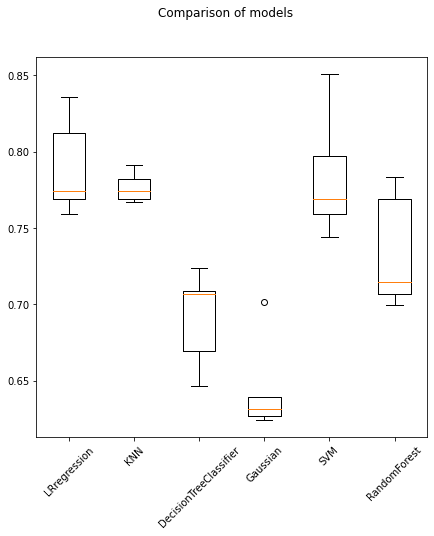

In [ ]:
fig = plt.figure(figsize=(7,7))
fig.suptitle('Comparison of models')
ax = fig.add_subplot(111)
ax.boxplot(results)
ax.set_xticklabels(names,rotation = 45)
plt.show()

### Entrainement sur le Test Set avec affinement des paramètres des meilleurs classifieurs

In [ ]:
model = RandomForestClassifier(n_estimators = 10)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
target_names = ["Fake","No Fake"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.74      0.81      0.77       163
     No Fake       0.80      0.73      0.76       170

    accuracy                           0.77       333
   macro avg       0.77      0.77      0.77       333
weighted avg       0.77      0.77      0.77       333



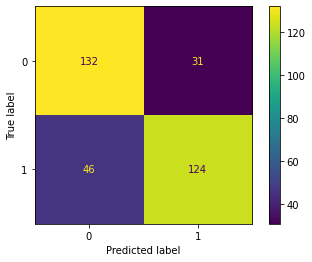

In [ ]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [ ]:
grid_param = {'n_estimators': [4, 6, 9, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

In [ ]:
gd_srRF = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=grid_param,
                    scoring='accuracy',
                    cv=5,
                    n_jobs=-1,
                    return_train_score=True)

In [ ]:
gd_srRF.fit(X_train, y_train)
print ('meilleur score ',
 gd_srRF.best_score_,'\n')
print ('meilleurs paramètres',
 gd_srRF.best_params_,'\n')
print ('meilleur estimateur',
gd_srRF.best_estimator_,'\n')

meilleur score  0.7795421389294132 

meilleurs paramètres {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 6} 

meilleur estimateur RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=5,
                       n_estimators=6) 



<p>
Le modèle performe très mal un processing supplémentaire sur les données va êtres nécessaires accuracy obtenu avec le TF_IDF seulement 55~60%
</p>
<p>
[EDIT] Avec de la feature extraction + term frequency résultat ~90% Bien meilleur !
</p>

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_param = {  
    'C' : [0.001,0.01,0.1,1,10,100]
}


gd_srLR = GridSearchCV(estimator=LogisticRegression(),  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1,
                    return_train_score=True)

gd_srLR.fit(X_train, y_train)
print ('meilleur score ',
 gd_srLR.best_score_,'\n')
print ('meilleurs paramètres',
 gd_srLR.best_params_,'\n')
print ('meilleur estimateur',
gd_srLR.best_estimator_,'\n')

meilleur score  0.7960498260576815 

meilleurs paramètres {'C': 0.001} 

meilleur estimateur LogisticRegression(C=0.001) 



In [ ]:
grid_param = {
    'C': [0.001, 0.01, 0.1, 1, 10], 
    'gamma' : [0.001, 0.01, 0.1, 1], 
    'kernel': ['linear','rbf']}

gd_srSVM = GridSearchCV(estimator=SVC(),  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=1,
                    return_train_score=True)

gd_srSVM.fit(X_train, y_train)  

print ('meilleur score ',gd_srSVM.best_score_,'\n')
print ('meilleurs paramètres', gd_srSVM.best_params_,'\n')
print ('meilleur estimateur',gd_srSVM.best_estimator_,'\n')

meilleur score  0.7930535293457525 

meilleurs paramètres {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'} 

meilleur estimateur SVC(C=0.1, gamma=0.001, kernel='linear') 



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Creation d'une instance de l'algorithme en utilisant les meilleurs paramètres
svc = gd_srSVM.best_estimator_

svc.fit(X_train, y_train)
result = svc.predict(X_test)
print('\n accuracy: ', accuracy_score(result, y_test),'\n')

conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)
print ('\n',classification_report(y_test, result))


 accuracy:  0.7927927927927928 


 matrice de confusion 
 [[132  31]
 [ 38 132]]

               precision    recall  f1-score   support

           0       0.78      0.81      0.79       163
           1       0.81      0.78      0.79       170

    accuracy                           0.79       333
   macro avg       0.79      0.79      0.79       333
weighted avg       0.79      0.79      0.79       333

